In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
dados_reviews = pd.read_csv('dados_reviews_tratados.csv', sep = ',')
dados_reviews['content'] = dados_reviews['content'].fillna('')
dados_reviews = dados_reviews[~dados_reviews['sentiment'].isin(['surprise', 'fear'])]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


# Vectorização com Bag-of-Words
vectorizer_bow = CountVectorizer()
BoW_matriz = vectorizer_bow.fit_transform(dados_reviews['content'])
palavras_bow = vectorizer_bow.get_feature_names_out()
BOW_dataframe = pd.DataFrame(BoW_matriz.toarray(), columns=palavras_bow)

# Vectorização com TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(dados_reviews['content'])
palavras_tfidf = vectorizer_tfidf.get_feature_names_out()
TFIDF_dataframe = pd.DataFrame(tfidf_matrix.toarray(), columns=palavras_tfidf)

# Definir as categorias
y = dados_reviews['sentiment']
y_polaridade = dados_reviews['sentiment_polarity']

# Configurar a avaliação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)

# Validação Cruzada Sentimento BoW

Validação cruzada para Sentiment: [0.30236486 0.3125     0.27702703 0.28716216 0.32601351]
Média dos Scores: 0.3010135135135135
Relatório de Classificação para Sentiment:
              precision    recall  f1-score   support

       anger       0.38      0.48      0.42       743
     disgust       0.42      0.29      0.34       952
   happiness       0.21      0.51      0.29       319
     neutral       0.05      0.24      0.08        82
     sadness       0.51      0.09      0.15       864

    accuracy                           0.30      2960
   macro avg       0.31      0.32      0.26      2960
weighted avg       0.40      0.30      0.29      2960

Matriz de Confusão para Sentiment:
[[ 78 182 282 225  97]
 [ 36 278 203 299 136]
 [ 12  33 162  44  68]
 [ 22 155 112 353 101]
 [  4  21  27  10  20]]


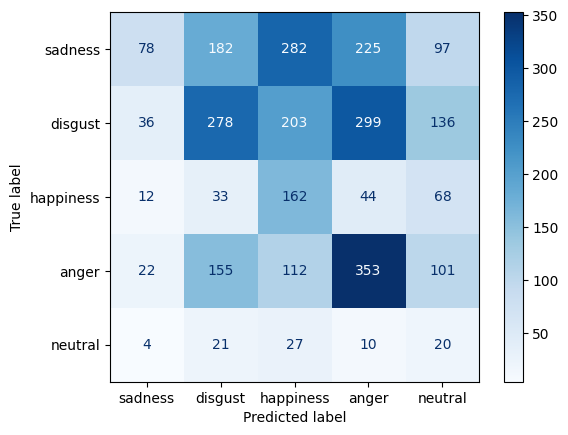

In [6]:
scores = cross_val_score(knn, BoW_matriz, y, cv=cv, scoring='accuracy')
print("Validação cruzada para Sentiment:", scores)
print("Média dos Scores:", scores.mean())

# Obter previsões de validação cruzada
predictions_BoW = cross_val_predict(knn, BoW_matriz, y, cv=cv)
print("Relatório de Classificação para Sentiment:")
print(classification_report(y, predictions_BoW, zero_division=0))

# matriz confusão
conf_matrix = confusion_matrix(y, predictions_BoW, labels=y.unique())
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=y.unique())
disp.plot(cmap='Blues')
print("Matriz de Confusão para Sentiment:")
print(conf_matrix)

# Validação Cruzada Sentimento TF-IDF

Validação cruzada para Sentiment: [0.47804054 0.45608108 0.44932432 0.44932432 0.45101351]
Média dos Scores: 0.45675675675675675
Relatório de Classificação para Sentiment:
              precision    recall  f1-score   support

       anger       0.47      0.44      0.46       743
     disgust       0.42      0.65      0.51       952
   happiness       0.54      0.34      0.42       319
     neutral       0.13      0.13      0.13        82
     sadness       0.55      0.33      0.41       864

    accuracy                           0.46      2960
   macro avg       0.42      0.38      0.39      2960
weighted avg       0.48      0.46      0.45      2960

Matriz de Confusão para Sentiment:
[[285 389  60 104  26]
 [ 86 618  14 213  21]
 [ 84  82 108  39   6]
 [ 51 327  14 330  21]
 [ 10  41   4  16  11]]


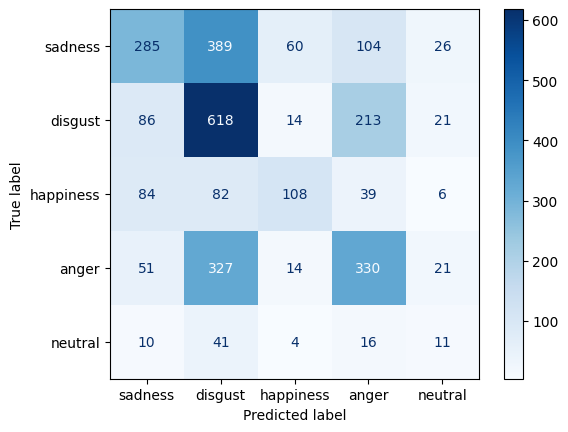

In [7]:
scores = cross_val_score(knn, tfidf_matrix, y, cv=cv, scoring='accuracy')
print("Validação cruzada para Sentiment:", scores)
print("Média dos Scores:", scores.mean())

# Obter previsões de validação cruzada
predictions = cross_val_predict(knn, tfidf_matrix, y, cv=cv)
print("Relatório de Classificação para Sentiment:")
print(classification_report(y, predictions, zero_division=0))

# matriz confusão
conf_matrix = confusion_matrix(y, predictions, labels=y.unique())
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=y.unique())
disp.plot(cmap='Blues')
print("Matriz de Confusão para Sentiment:")
print(conf_matrix)

# Validação Cruzada Polaridade BoW

Validação cruzada para Sentiment Polarity: [0.58783784 0.52364865 0.56756757 0.56925676 0.57939189]
Média dos Scores: 0.5655405405405405
Relatório de Classificação para Sentiment Polarity:
              precision    recall  f1-score   support

    negative       0.66      0.70      0.68      1695
     neutral       0.06      0.27      0.09        82
    positive       0.60      0.39      0.47      1183

    accuracy                           0.57      2960
   macro avg       0.44      0.45      0.42      2960
weighted avg       0.62      0.57      0.58      2960

Matriz de Confusão para Sentiment Polarity:
[[ 459  564  160]
 [ 293 1193  209]
 [  14   46   22]]


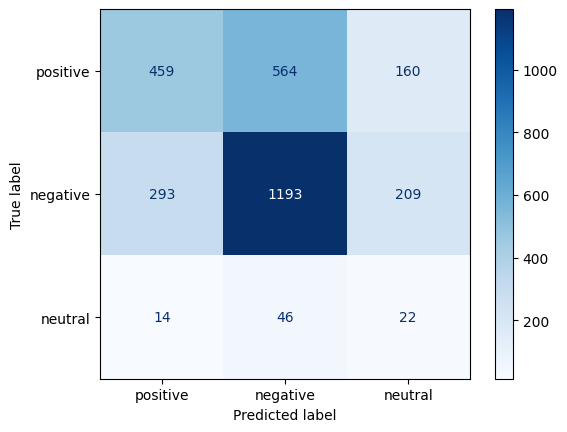

In [8]:
# Avaliação cruzada para Sentiment Polarity
scores_polaridade = cross_val_score(knn, BoW_matriz, y_polaridade, cv=cv, scoring='accuracy')
print("Validação cruzada para Sentiment Polarity:", scores_polaridade)
print("Média dos Scores:", scores_polaridade.mean())

# Obter previsões de validação cruzada para polaridade
predictions_polaridade_BoW = cross_val_predict(knn, BoW_matriz, y_polaridade, cv=cv)
print("Relatório de Classificação para Sentiment Polarity:")
print(classification_report(y_polaridade, predictions_polaridade_BoW, zero_division=0))

# Gerar e mostrar a matriz de confusão para Sentiment Polarity
conf_matrix_polaridade = confusion_matrix(y_polaridade, predictions_polaridade_BoW, labels=y_polaridade.unique())
disp_polaridade = ConfusionMatrixDisplay(conf_matrix_polaridade, display_labels=y_polaridade.unique())
disp_polaridade.plot(cmap='Blues')
print("Matriz de Confusão para Sentiment Polarity:")
print(conf_matrix_polaridade)

# Validação Cruzada Polaridade TF-IDF

Validação cruzada para Sentiment Polarity: [0.73141892 0.67567568 0.70608108 0.67398649 0.65878378]
Média dos Scores: 0.6891891891891893
Relatório de Classificação para Sentiment Polarity:
              precision    recall  f1-score   support

    negative       0.68      0.92      0.78      1695
     neutral       0.12      0.11      0.11        82
    positive       0.80      0.41      0.54      1183

    accuracy                           0.69      2960
   macro avg       0.53      0.48      0.48      2960
weighted avg       0.71      0.69      0.66      2960

Matriz de Confusão para Sentiment Polarity:
[[ 480  673   30]
 [ 108 1551   36]
 [  10   63    9]]


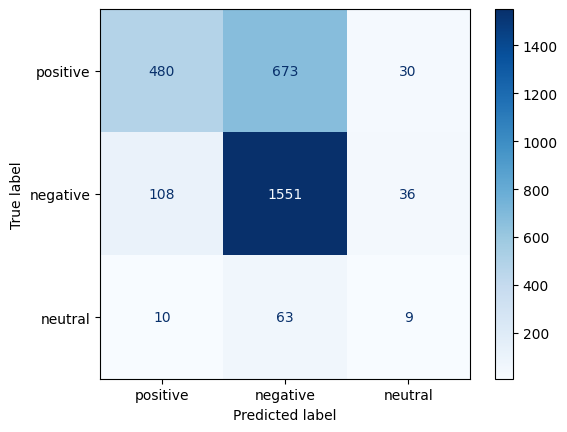

In [9]:
# Avaliação cruzada para Sentiment Polarity
scores_polaridade = cross_val_score(knn, tfidf_matrix, y_polaridade, cv=cv, scoring='accuracy')
print("Validação cruzada para Sentiment Polarity:", scores_polaridade)
print("Média dos Scores:", scores_polaridade.mean())

# Obter previsões de validação cruzada para polaridade
predictions_polaridade_tfidf = cross_val_predict(knn, tfidf_matrix, y_polaridade, cv=cv)
print("Relatório de Classificação para Sentiment Polarity:")
print(classification_report(y_polaridade, predictions_polaridade_tfidf, zero_division=0))

# Gerar e mostrar a matriz de confusão para Sentiment Polarity
conf_matrix_polaridade = confusion_matrix(y_polaridade, predictions_polaridade_tfidf, labels=y_polaridade.unique())
disp_polaridade = ConfusionMatrixDisplay(conf_matrix_polaridade, display_labels=y_polaridade.unique())
disp_polaridade.plot(cmap='Blues')
print("Matriz de Confusão para Sentiment Polarity:")
print(conf_matrix_polaridade)

# Teste com avalições da Google Play

In [10]:
knn_BoW = KNeighborsClassifier(n_neighbors=5)
knn_polaridade_BoW = KNeighborsClassifier(n_neighbors=5)
knn_BoW.fit(BOW_dataframe, y)
knn_polaridade_BoW.fit(BOW_dataframe, y_polaridade)
knn_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_polaridade_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_tfidf.fit(TFIDF_dataframe, y)
knn_polaridade_tfidf.fit(TFIDF_dataframe, y_polaridade)

KNeighborsClassifier()

In [22]:
import pandas as pd
teste_emocoes = pd.read_csv('teste_tratado.csv', sep = ',')
teste_emocoes.head(1)

,numero,content,sentiment_polarity,sentiment,app
0,1,último pedir app realmente último pra pe...,negative,disgust,iFood


In [23]:
avaliacao_BoW = vectorizer_bow.transform(teste_emocoes['content'])
avaliacao_tfidf = vectorizer_tfidf.transform(teste_emocoes['content'])

# Teste KNN com BoW sentimento

In [24]:
emocao_predita = knn_BoW.predict(avaliacao_BoW)

print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment']))

/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


emocao predita:
['disgust' 'disgust' 'happiness' 'happiness' 'neutral' 'happiness' 'anger'
 'happiness' 'happiness']
emocao real:
['disgust', 'sadness', 'happiness', 'happiness', 'anger', 'sadness', 'anger', 'happiness', 'happiness']


# Teste KNN com TF-IDF sentimento

In [25]:
emocao_predita = knn_tfidf.predict(avaliacao_tfidf)
print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment']))

emocao predita:
['anger' 'anger' 'happiness' 'sadness' 'disgust' 'sadness' 'anger'
 'happiness' 'happiness']
emocao real:
['disgust', 'sadness', 'happiness', 'happiness', 'anger', 'sadness', 'anger', 'happiness', 'happiness']


/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Teste KNN com BoW polaridade

In [26]:
emocao_predita = knn_polaridade_BoW.predict(avaliacao_BoW)
print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment_polarity']))

/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


emocao predita:
['negative' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'neutral' 'positive']
emocao real:
['negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive']


# Teste KNN com TF-IDF polaridade

In [27]:
emocao_predita = knn_polaridade_tfidf.predict(avaliacao_tfidf)
print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment_polarity']))

emocao predita:
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'positive']
emocao real:
['negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive']


/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
